# **_Lineer Olmayan Regresyon Modelleri ile Maaş Tahmini_**

Lineer olmayan regresyon modelleri kullanılarak maaş tahminleme üzerine bir proje gerçekleştirilecektir. 
Amaç beyzbol oyuncularının maaşlarını tahmin edecek bir makine öğrenmesi modeli geliştirmektir.

**Uygulanacak Regresyon Modelleri**

- KNN(K En Yakın Komşu) Regresyon
- SVR(Destek Vektör Regresyon)
- CART(Karar Ağacı Regresyon)
- Rastgele Orman Regresyon(Random Forest)
- XGBoost Regresyon
- LightGBM Regresyon
- CatBoost Regresyon

**Bağımlı Değişken:** Salary (1986-1987 sezonunda kazanılan maaş(birimi: bin))

**Bağımsız Değişkenler:** 

- AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
- Hits: 1986-1987 sezonundaki isabet sayısı
- HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
- Runs: 1986-1987 sezonunda takımına kaç sayı kazandırdı
- RBI: Bir vurucunun vuruş yaptıgında kaç tane oyuncuya koşu yaptırdığı.
- Walks: Karşı oyuncuya kaç defa hata yaptırdığı
- Years: Oyuncunun major liginde kaç sene oynadığı
- CAtBat: Oyuncunun kariyeri boyunca kaç kez topa vurduğu
- CHits*: Oyuncunun kariyeri boyunca kaç kez isabetli vuruş yaptığı
- CHmRun*: Oyucunun kariyeri boyunca kaç kez en değerli vuruşu yaptığı
- CRuns: Oyuncunun kariyeri boyunca takımına kaç tane sayı kazandırdığı
- CRBI: Oyuncunun kariyeri boyunca kaç tane oyuncuya koşu yaptırdığı
- CWalks: Oyuncun kariyeri boyunca karşı oyuncuya kaç kez hata yaptırdığı
- League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
- Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
- PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
- Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
- Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
- NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

**Gözlem Sayısı:** 322

**Değişken Sayısı:** 20

# **Keşifçi Veri Analizi**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
#Veri setini okutup ilk 5 satırını gözlemliyoruz.
data = pd.read_csv("Hitters.csv")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#Veri setinini boyutunu inceliyoruz. 322 adet gözlem ve 20 değişken bulunmaktadır.
data.shape

(322, 20)

In [4]:
#Veri setine istatiktiksel olarak göz atıyoruz.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [5]:
#Kategorik değişken olup olmadığına bakıyoruz. Veri setinde 3 adet kategorik değişken bulunuyor.
data.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [6]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
categorical_columns

['League', 'Division', 'NewLeague']

In [7]:
numeric_columns = [c for c in data.columns if c not in categorical_columns]
numeric_columns

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

# **Değişkenlerin Ayrıntılı İncelenmesi**

In [8]:
#Kategorik değişkenlerin sınıflarından kaçar adet olduğunu inceliyoruz.
print(data["League"].value_counts())
print(data["NewLeague"].value_counts())
print(data["Division"].value_counts())

A    175
N    147
Name: League, dtype: int64
A    176
N    146
Name: NewLeague, dtype: int64
W    165
E    157
Name: Division, dtype: int64


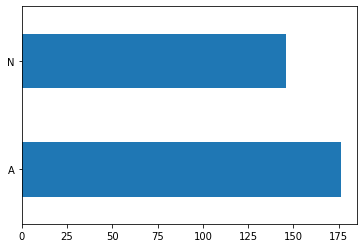

In [9]:
data.NewLeague.value_counts().plot.barh();

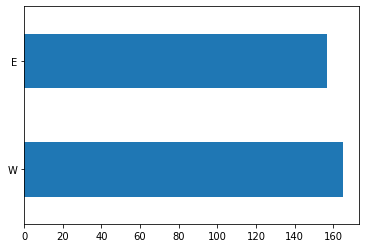

In [10]:
data.Division.value_counts().plot.barh();

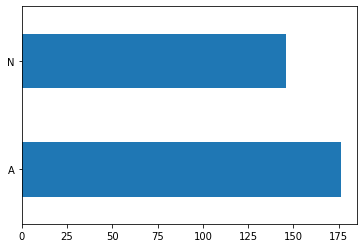

In [11]:
data.NewLeague.value_counts().plot.barh();

In [12]:
# Bağımlı değişken olan salary değişkeninin maksimum ve minimum değerlerini buluyoruz.
print("Salary maksimum değer:", data["Salary"].max())
print("Salary minimum değer:", data["Salary"].min())

Salary maksimum değer: 2460.0
Salary minimum değer: 67.5


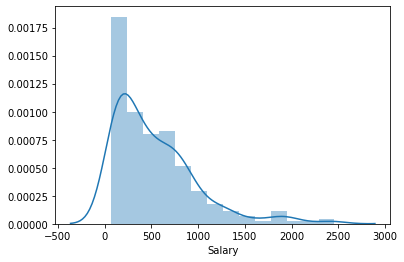

In [13]:
# Salary değişkeninin histogram ve yoğunluk grafiğini çizdiriyoruz.
sns.distplot(data.Salary);

# **Korelasyon İncelemesi**

In [14]:
# Veri setinin korelasyonunu inceleyerek değişkenler arasında ne tür bir ilişki olduğunu anlayabiliriz. 
# Korelasyon değeri > 0 ise pozitif korelasyon bulunmaktadır. Bir değişken değeri artarken diğer değişkenin de değeri artmaktadır.
# Korelasyon = 0 ise değişkenler arasında ilişki yoktur anlamına gelir.
# Korelasyon < 0 ise negatif korelasyon bulunmaktadır. Bir değişken artarken diğer değişken azalmaktadır. 
# Korelasyonlar incelendiğinde salary bağımlı değişkene pozitif korelasyon olarak etkimekte olan 2 değişken bulunmaktadır. 
# Bu değişkenler CRBI ile CRuns değişkenleridir. Bunlar arttıkça Salary (Maaş) değişkeni de artmaktadır.
data.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


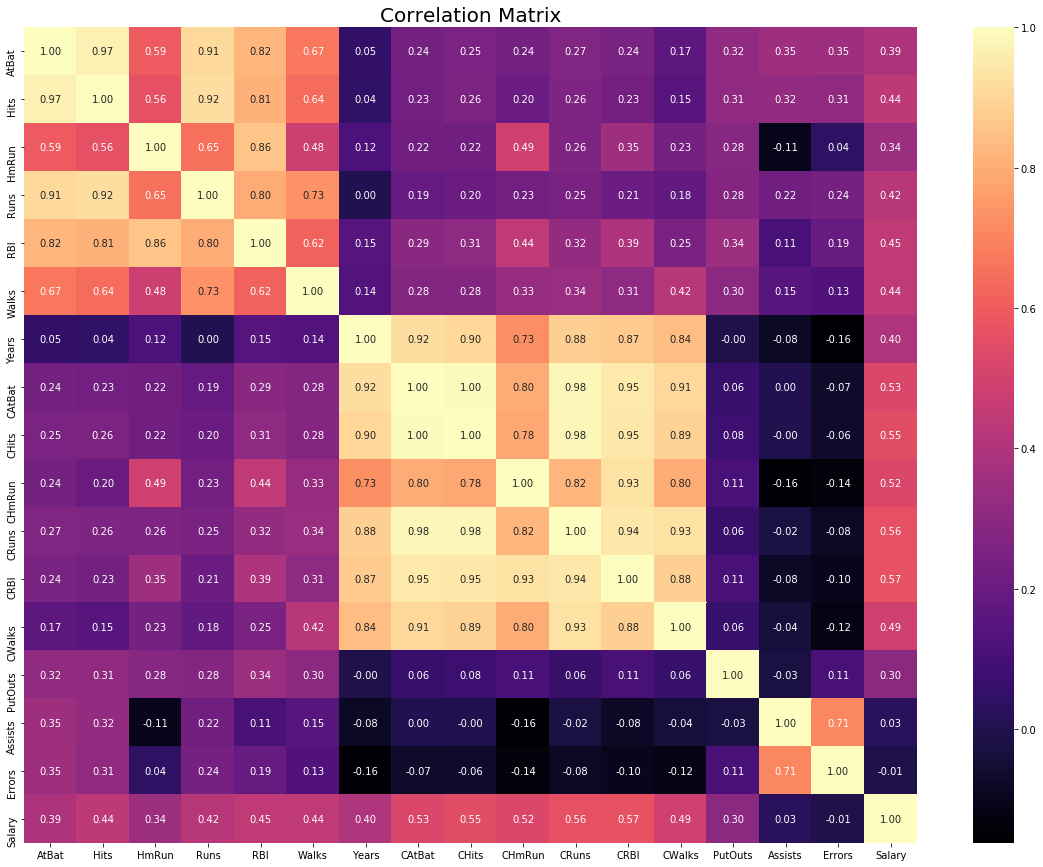

In [15]:
# Veri setinin korelasyon matrisi grafiğini oluşturuyoruz.
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [16]:
#League değişkenine göre groupby yapılıp hangi ligde ortalama ne kadar maaş alındığını buluyoruz.
data.groupby("League").agg({"Salary": "mean"})

,Salary
League,
A,541.999547
N,529.117500


In [17]:
#Oyuncunun oynadığı pozisyona göre ortalama ne kadar maaş aldığını buluyoruz.
data.groupby("Division").agg({"Salary": "mean"})

,Salary
Division,
E,624.271364
W,450.876873


In [18]:
#Veri setinin korelasyonu incelendiğinde en yüksek pozitif yönlü korelasyona CRBI değişkeni sahipti. Bu değişken arttıkça salary değişkenin de artmasını bekleriz.
#CRBI değişkeni kariyeri boyunca yapmış olduğu vuruş sayısıdır. CRBI değişkenine göre gruplayıp salary değişkeninin ortalamasını inceliyoruz.
data.groupby("CRBI").agg({"Salary": "mean"})

,Salary
CRBI,
0,NaN
3,920.000
4,NaN
7,2127.333
9,70.000
...,...
1299,1450.000
1314,750.000
1348,500.000


In [19]:
#Veri setinde CRBI değişkeninden sonra en yüksek korelasyona CRuns değişkeni sahip. Aynı işlemi onun için de yapıyoruz.
data.groupby("CRuns").agg({"Salary": "mean"})

,Salary
CRuns,
1,NaN
2,920.000
3,NaN
6,2127.333
9,NaN
...,...
1172,200.000
1175,535.000
1272,NaN


In [20]:
#Yeni lig ve oyuncunun ligde oynadığı süresine göre gruplanarak oyuncunun aldıkları maaşların ortalamasını buluyoruz.
data.groupby(["NewLeague","Years"]).agg({"Salary": "mean"})

Salary
NewLeague Years             
A         1       191.388889
          2       124.722222
          3       187.250000
          4       265.178571
          5       580.078947
          6       630.441176
          7       590.416667
          8       767.395875
          9       854.000000
          10      837.762000
          11      775.000000
          12      516.428571
          13     1275.000000
          14      912.351429
          15      563.333250
          16      670.000000
          17      686.666667
          18      509.166750
          20      487.500000
N         1       102.687500
          2       286.361083
          3       157.916667
          4       383.392857
          5       540.714286
          6       613.757545
          7       741.794846
          8       462.222333
          9       829.404714
          10      612.857143
          11      896.875000
          12      770.555667
          13     1015.095167
          14      763.333400
          15      652.777667
          16      275.000000
          17      546.666500
          18     1450.000000
          19      500.000000
          20      200.000000
          23             NaN
          24      750.000000

In [21]:
#Kariyeri boyunca isabet sayısı en yüksek olan gözlem birimlerine göre veri setini azalan şekilde sıralayalım. 
data.sort_values("CHits", ascending = False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.000,N
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
278,557,142,21,58,81,23,18,8759,2583,271,1138,1299,478,N,W,1160,53,7,1450.000,N
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,487.500,A
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
283,16,2,0,1,0,0,2,28,4,0,1,0,0,A,E,247,4,8,NaN,A


In [22]:
#Liglere göre gruplayarak kariyeri boyunca yapılan isabet sayılarının maksimum değerine erişelim.
data.groupby("League").agg({"CHits": "max"})

,CHits
League,
A,2510
N,4256


In [23]:
#Oyuncuların oynadıkları pozisyonlara göre gruplama yaparak kariyeri boyunca isabet sayısının maksimum değerine erişelim.
data.groupby("Division").agg({"CHits": "max"})

,CHits
Division,
E,2464
W,4256


In [24]:
#Lig değişkenine göre gruplayarak beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişelim.
data.groupby("League").agg({"AtBat": "max"})

,AtBat
League,
A,687
N,642


In [25]:
#Lig değişkenine göre gruplayarak liglerde yapılan hataların ortalama değerlerine erişelim.
data.groupby("League").agg({"Errors": "mean"})

,Errors
League,
A,7.582857
N,8.585034


In [26]:
#Lig değişkenine göre gruplayarak liglerde yapılan hataların maksimum değerlerine erişelim.
data.groupby("League").agg({"Errors": "max"})

,Errors
League,
A,26
N,32


In [27]:
#Oyuncunun ligde oynadığı süresine göre gruplayıp oyuncunun kariyeri boyunca beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişelim.
data.groupby("Years").agg({"CAtBat": "max"})

,CAtBat
Years,
1,593
2,1236
3,1928
4,2020
5,2778
6,3210
7,3754
8,4071
9,4739


In [28]:
#Lig değişkenine göre gruplayıp kariyeri boyunca acaba liglerde beyzbol sopası ile ortalama kaç atış gerçekleşmiştir buna erişelim.
data.groupby("League").agg({"CAtBat": "mean"})

,CAtBat
League,
A,2709.805714
N,2575.918367


# **Veri Ön İşleme**

*Veri setinde maaş değişkeniyle yüksek korelasyon ilişkisi olan oyuncunun kariyerine bağlı değişkenler ve oyuncunun ligde oynadığı süresi yer almaktadır. 
Bu durumda kariyere bağlı değişkenler/kariyer süresi yapılırsa oyuncu için ortalama değerler elde edilerek mantıklı yeni değişkenler oluşturulabilir.*

In [29]:
data["OrtCAtBat"] = data["CAtBat"] / data["Years"] #Oyuncunun kariyeri boyunca ortalama kaç kez topa vurduğu
data["OrtCHits"] = data["CHits"] / data["Years"] #Oyuncunun kariyeri boyunca ortalama kaç kez isabetli vuruş yaptığı
data["OrtCHmRun"] = data["CHmRun"] / data["Years"] #Oyuncunun kariyeri boyunca ortalama kaç kez en değerli vuruşu yaptığı
data["OrtCruns"] = data["CRuns"] / data["Years"] #Oyuncunun kariyeri boyunca takımına ortalama kaç tane sayı kazandırdığı
data["OrtCRBI"] = data["CRBI"] / data["Years"] #Oyuncunun kariyeri boyunca ortalama kaç tane oyuncuya koşu yaptırdığı
data["OrtCWalks"] = data["CWalks"] / data["Years"] #Oyuncun kariyeri boyunca karşı oyuncuya ortalama kaç kez hata yaptırdığı
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,293,66,1,30,29,14,1,293,66,1,...,33,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [30]:
#Amacımız maaş tahmini yapmak olduğu için maaş değişkeniyle yüksek korelasyon içerisinde olan değişkenlere bakarak tahminleme yapacağız.
data = data.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks','Assists','Errors','PutOuts'], axis=1)

In [31]:
data.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,Salary,NewLeague,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,1,293,66,1,30,29,14,A,E,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14,3449,835,69,321,414,375,N,W,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3,1624,457,63,224,266,263,A,W,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11,5628,1575,225,828,838,354,N,E,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2,396,101,12,48,46,33,N,E,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


**One Hot Encoding Dönüşümü**

In [32]:
#Kategorik değişkenlerin sayısal değerlere dönüştürülmesi için Label Encoding ve One Hot Encoding yöntemleri kullanılmaktadır.
#One Hot Encoding yaparak kategorik değişkenleri sayısal değerlere dönüştürüp dummy değişken tuzağından korunalım.
data = pd.get_dummies(data, columns =  ["Division"], drop_first = True)
data = pd.get_dummies(data, columns =  ["League"], drop_first = True)
data = pd.get_dummies(data, columns =  ["NewLeague"], drop_first = True)
data.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Division_W,League_N,NewLeague_N
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0,0,0
1,14,3449,835,69,321,414,375,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,1,1,1
2,3,1624,457,63,224,266,263,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,1,0,0
3,11,5628,1575,225,828,838,354,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,0,1,1
4,2,396,101,12,48,46,33,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,0,1,1


**Eksik Değer Sorgulaması**

In [33]:
#Veri setinde kaç adet eksik değer var?
data.isnull().sum()

Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
Salary         59
OrtCAtBat       0
OrtCHits        0
OrtCHmRun       0
OrtCruns        0
OrtCRBI         0
OrtCWalks       0
Division_W      0
League_N        0
NewLeague_N     0
dtype: int64

In [34]:
#Veri setinde kaç adet dolu değer var?
data.notnull().sum()

Years          322
CAtBat         322
CHits          322
CHmRun         322
CRuns          322
CRBI           322
CWalks         322
Salary         263
OrtCAtBat      322
OrtCHits       322
OrtCHmRun      322
OrtCruns       322
OrtCRBI        322
OrtCWalks      322
Division_W     322
League_N       322
NewLeague_N    322
dtype: int64

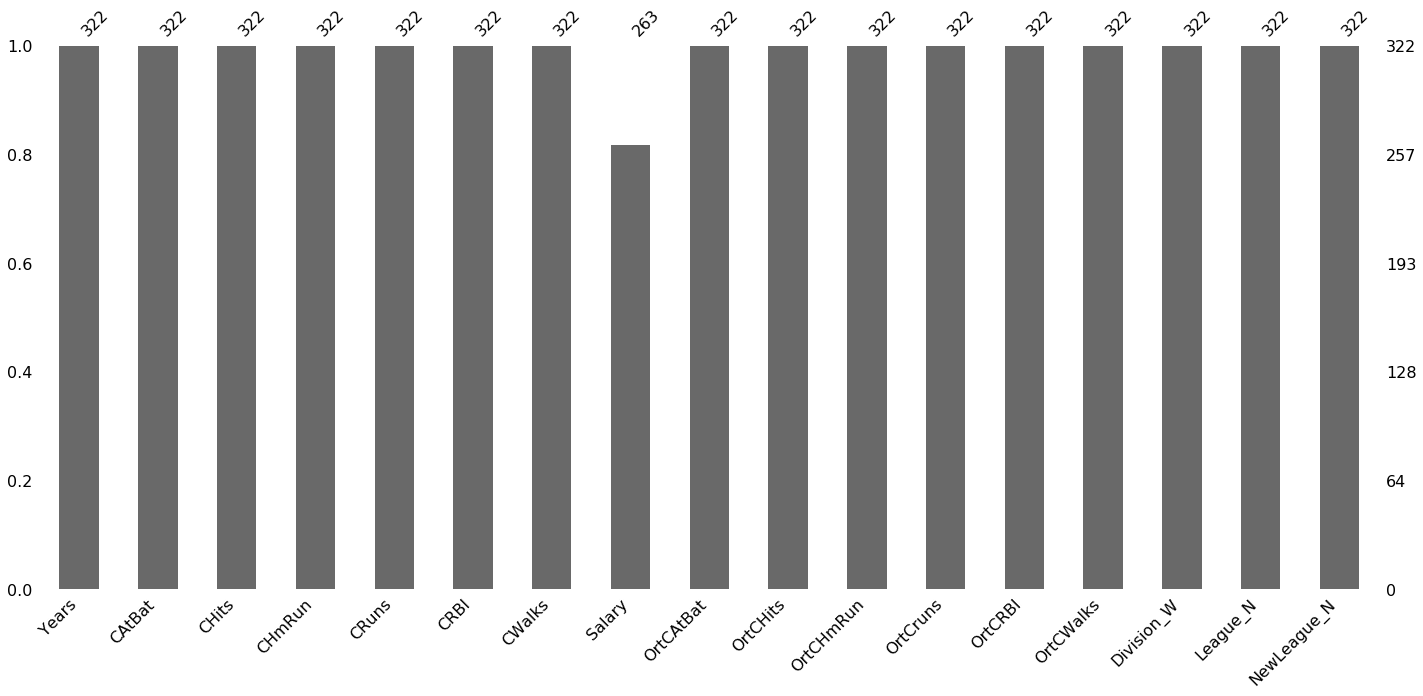

In [35]:
import missingno as msno
msno.bar(data);

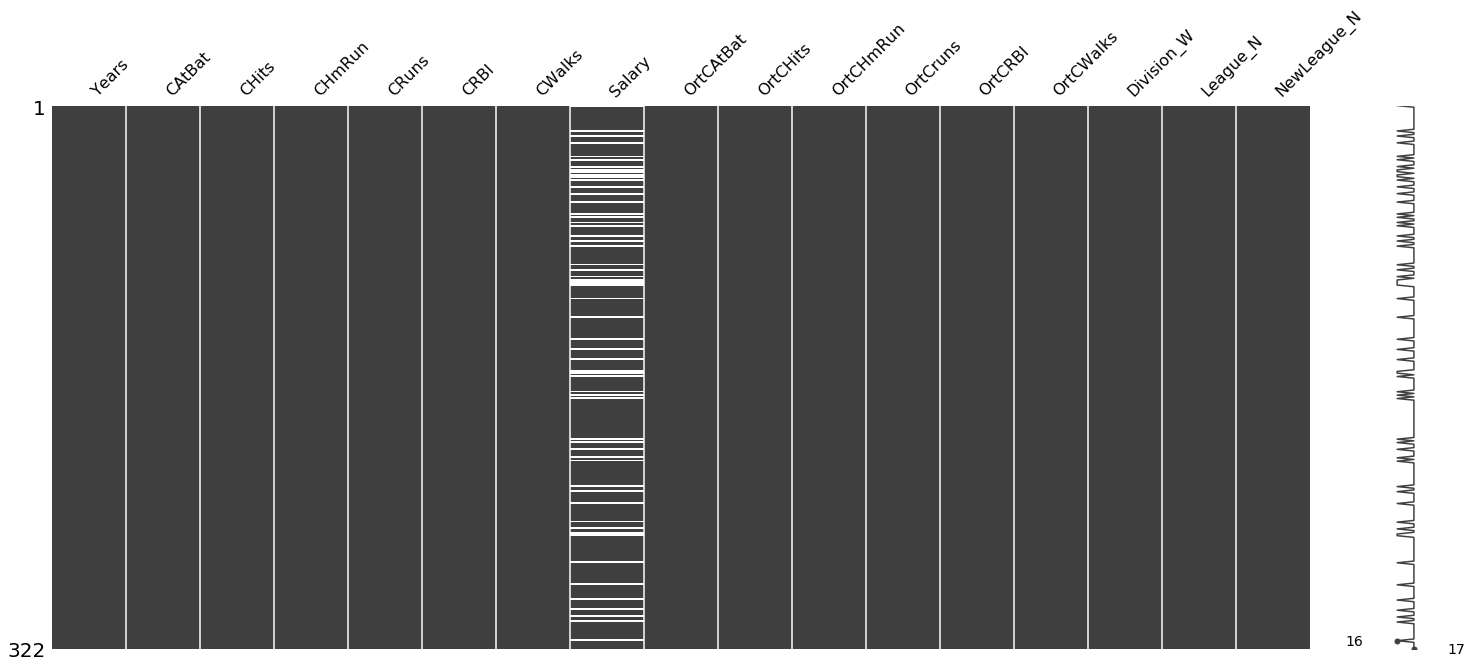

In [36]:
msno.matrix(data);

In [37]:
#Eksik gözlem olan değerlerin kaç yıllık kariyere sahip olduklarını ve hangi ligde oynadıklarını inceleyelim.
data_eksik = data[data["Salary"].isnull()].head()
data_eksik

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Division_W,League_N,NewLeague_N
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0,0,0
15,3,201,42,3,20,16,11,NaN,67.000000,14.000000,1.000000,6.666667,5.333333,3.666667,1,0,0
18,12,5233,1478,100,643,658,653,NaN,436.083333,123.166667,8.333333,53.583333,54.833333,54.416667,1,0,0
22,6,84,26,2,9,9,3,NaN,14.000000,4.333333,0.333333,1.500000,1.500000,0.500000,1,0,0
30,17,6890,1833,224,1033,864,1087,NaN,405.294118,107.823529,13.176471,60.764706,50.823529,63.941176,1,0,0


In [38]:
#Eksik değerleri veri setinden çıkarıyoruz.
data=data.dropna()
data.shape

(263, 17)

**Aykırı Değer Sorgulaması**

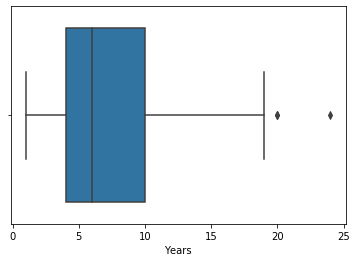

In [39]:
sns.boxplot(x = data["Years"]);

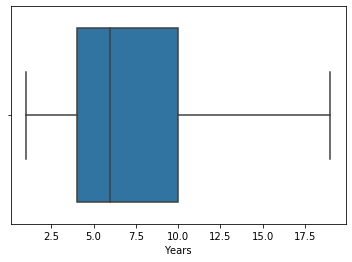

In [40]:
Q1 = data["Years"].quantile(0.25)
Q3 = data["Years"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["Years"] > upper) | (data["Years"] < lower)
data["Years"] = data["Years"][~(outliers)]
sns.boxplot(x = data["Years"]);

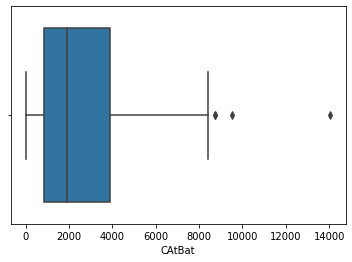

In [41]:
sns.boxplot(x = data["CAtBat"]);

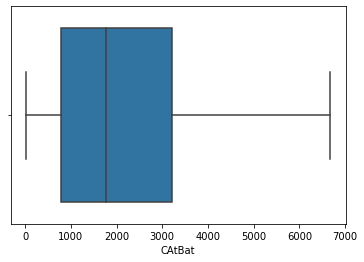

In [42]:
Q1 = data["CAtBat"].quantile(0.30)
Q3 = data["CAtBat"].quantile(0.70)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CAtBat"] > upper) | (data["CAtBat"] < lower)
data["CAtBat"] = data["CAtBat"][~(outliers)]
sns.boxplot(x = data["CAtBat"]);

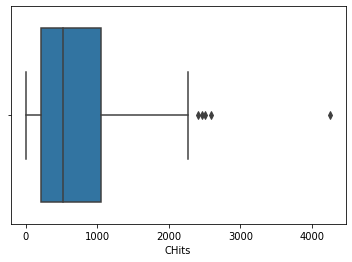

In [43]:
sns.boxplot(x = data["CHits"]);

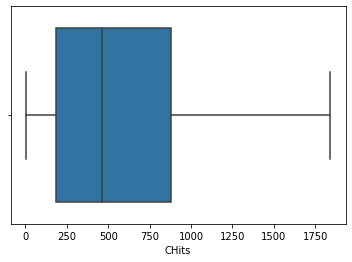

In [44]:
Q1 = data["CHits"].quantile(0.30)
Q3 = data["CHits"].quantile(0.70)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CHits"] > upper) | (data["CHits"] < lower)
data["CHits"] = data["CHits"][~(outliers)]
sns.boxplot(x = data["CHits"]);

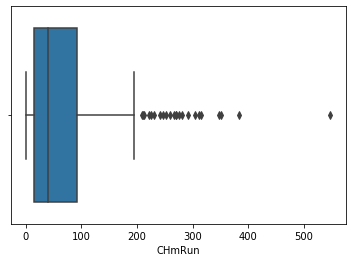

In [45]:
sns.boxplot(x = data["CHmRun"]);

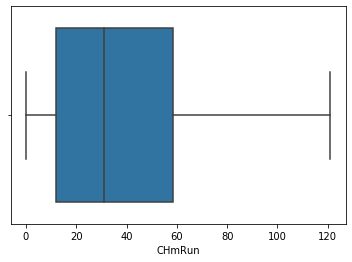

In [46]:
Q1 = data["CHmRun"].quantile(0.35)
Q3 = data["CHmRun"].quantile(0.65)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CHmRun"] > upper) | (data["CHmRun"] < lower)
data["CHmRun"] = data["CHmRun"][~(outliers)]
sns.boxplot(x = data["CHmRun"]);

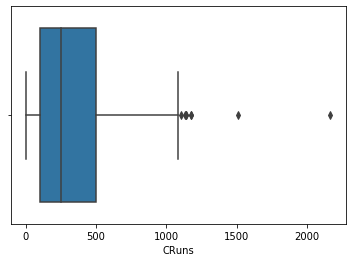

In [47]:
sns.boxplot(x = data["CRuns"]);

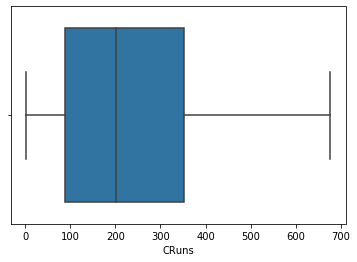

In [48]:
Q1 = data["CRuns"].quantile(0.35)
Q3 = data["CRuns"].quantile(0.65)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CRuns"] > upper) | (data["CRuns"] < lower)
data["CRuns"] = data["CRuns"][~(outliers)]
sns.boxplot(x = data["CRuns"]);

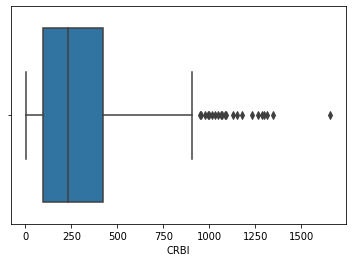

In [49]:
sns.boxplot(x = data["CRBI"]);

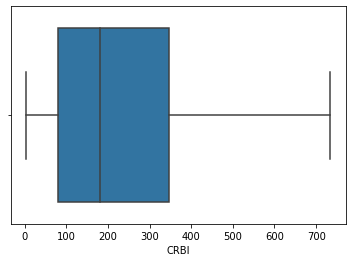

In [50]:
Q1 = data["CRBI"].quantile(0.30)
Q3 = data["CRBI"].quantile(0.70)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CRBI"] > upper) | (data["CRBI"] < lower)
data["CRBI"] = data["CRBI"][~(outliers)]
sns.boxplot(x = data["CRBI"]);

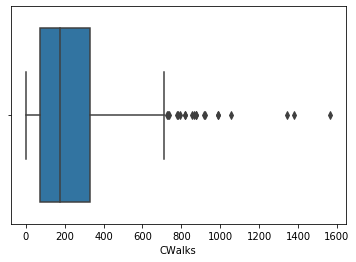

In [51]:
sns.boxplot(x = data["CWalks"]);

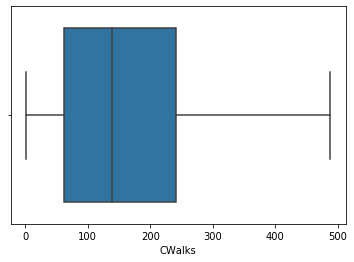

In [52]:
Q1 = data["CWalks"].quantile(0.35)
Q3 = data["CWalks"].quantile(0.65)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["CWalks"] > upper) | (data["CWalks"] < lower)
data["CWalks"] = data["CWalks"][~(outliers)]
sns.boxplot(x = data["CWalks"]);

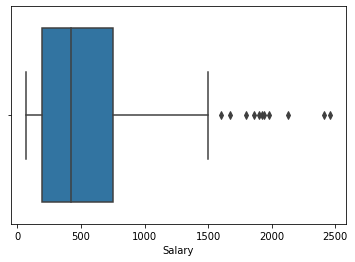

In [53]:
sns.boxplot(x = data["Salary"]);

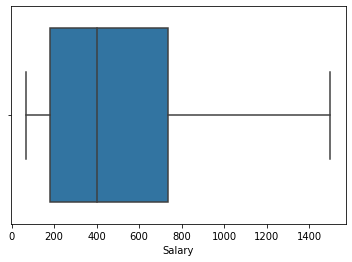

In [54]:
Q1 = data["Salary"].quantile(0.25)
Q3 = data["Salary"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = (data["Salary"] > upper) | (data["Salary"] < lower)
data["Salary"] = data["Salary"][~(outliers)]
sns.boxplot(x = data["Salary"]);

In [55]:
data=data.dropna()
data.shape

(203, 17)

**Verilerin Standartlaştırılması**

In [56]:
scaler = StandardScaler()
normalizer = preprocessing.Normalizer()

In [57]:
y = data["Salary"]
X = data.drop('Salary', axis=1)
cols = X.columns

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = cols)
X.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Division_W,League_N,NewLeague_N
0,2.425983,1.434321,1.131656,1.085383,0.640134,1.607291,2.044877,-0.451866,-0.555216,-0.353626,-0.871004,-0.264049,-0.022473,0.956606,0.995086,1.035098
1,-0.758744,-0.068702,0.010708,0.887716,0.029403,0.540875,1.027116,1.914112,2.014880,2.460519,1.842948,3.029739,4.389417,0.956606,-1.004938,-0.966092
2,-1.048264,-1.080051,-1.045000,-0.792453,-1.078727,-1.044338,-1.062928,-0.839734,-0.808727,-0.166017,-0.814802,-0.630320,-0.767852,-1.045363,0.995086,1.035098
3,1.557421,2.224129,2.015366,-0.561841,1.773448,1.045261,0.400103,0.786323,0.646979,-0.914181,0.315378,-0.209759,-0.685503,0.956606,-1.004938,-0.966092
4,-1.048264,-1.229941,-1.219962,-1.154842,-1.192059,-1.310942,-1.144712,-1.569637,-1.626694,-1.129080,-1.286902,-1.661453,-1.093956,-1.045363,0.995086,-0.966092


# **Doğrusal Olmayan Regresyon Modelleri ile Modelleme**

### **1) İlk Sonuçlar**

In [59]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))

In [60]:
y = data["Salary"]
X = data.drop("Salary", axis=1)
cols = X.columns
cols

Index(['Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'OrtCAtBat', 'OrtCHits', 'OrtCHmRun', 'OrtCruns', 'OrtCRBI',
       'OrtCWalks', 'Division_W', 'League_N', 'NewLeague_N'],
      dtype='object')

In [61]:
#Feature Selection
#Wrapper Method
#Backward Elimination
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Years', 'CRuns', 'CRBI', 'CWalks', 'OrtCAtBat', 'OrtCHits']


In [62]:
y = data["Salary"]
X = data[selected_features_BE]

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [64]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        msg = "%s: (%f)" % (name, rmse)
        print(msg)

KNN: (187.694059)
SVR: (285.298491)
CART: (215.579045)
RF: (172.863569)
GBM: (182.352459)
XGBoost: (185.059998)
LightGBM: (188.030689)
CatBoost: (179.829599)


### **2) Model Tuning**

**2.1) KNN(K En Yakın Komşu) Regresyon**

In [65]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [66]:
knn_cv_model.best_params_

{'n_neighbors': 6}

In [67]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

In [68]:
y_pred = knn_tuned.predict(X_test)
knn_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
knn_tuned_score

183.41057924331935

**2.2) SVR(Destek Vektör Regresyon)**

In [69]:
#nonlinear
svr_model = SVR() 

svr_params = {"C": [0.01, 0.1,0.3,0.5,0.8,1,5, 10, 50, 100,500,1000,10000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    3.4s finished


In [70]:
svr_cv_model.best_params_

{'C': 100}

In [71]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [72]:
y_pred = svr_tuned.predict(X_test)
svr_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
svr_tuned_score

170.73439481925732

**2.3) CART(Karar Ağacı Regresyon)**

In [73]:
cart_params = {"max_depth": [2,3,4,5,6,8,10,20,30,50, 100, 500, 1000,5000,10000],
              "min_samples_split": [2,5,10,20,30,50,100,500,1000,5000,10000]}

In [74]:
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [75]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
cart_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
cart_tuned_score

190.2098807801877

**2.4) Rastgele Orman Regresyon(Random Forest)**

In [76]:
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [100, 500, 1000],
            "min_samples_split": [2,10,30]}

In [77]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.9min finished


In [78]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [79]:
rf_tuned = RandomForestRegressor(max_depth=30,
            max_features=3,
            n_estimators=1000,
            min_samples_split=2).fit(X_train, y_train)

In [80]:
y_pred = rf_tuned.predict(X_test)
rf_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_score

173.69396678226246

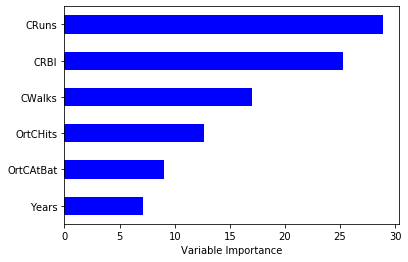

In [81]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'b', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**2.5) XGBoost Regresyon**

In [82]:
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}

In [83]:
xgb = XGBRegressor()
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   27.0s finished


In [84]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [85]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
xgb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_score

173.25477296003933

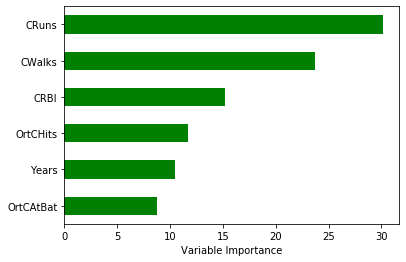

In [86]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'g', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**2.6) LightGBM Regresyon**

In [87]:
lgb_model = LGBMRegressor()
lgbm_params = {"learning_rate": [0.01, 0.1, 1],
              "n_estimators": [200,1000,10000],
              "max_depth": [2,5,10],
              "colsample_bytree": [1,0.5,0.3]}

In [88]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.3min finished


In [89]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

In [90]:
lgbm_tuned = LGBMRegressor(learning_rate=0.01,
              n_estimators=300,
              max_depth=5,
              colsample_bytree=1).fit(X_train, y_train)

In [91]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_score

179.32271457804012

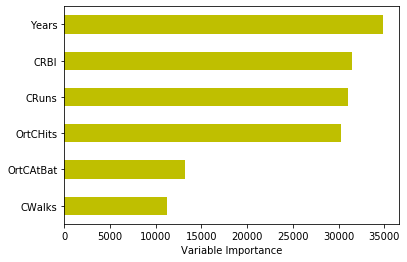

In [92]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'y', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**2.7) CatBoost Regresyon**

In [93]:
catb_model = CatBoostRegressor(verbose = False)
catb_params = {"iterations": [500,1000,10000],
              "learning_rate": [0.01,0.1,1],
              "depth": [2,6,10]}

In [94]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\Melek Aslan\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 28.8min finished


In [95]:
catb_cv_model.best_params_

{'depth': 6, 'iterations': 500, 'learning_rate': 0.01}

In [96]:
catb_tuned = CatBoostRegressor(iterations=670,
              learning_rate=0.01,
              depth=6,verbose=False).fit(X_train, y_train)

In [97]:
y_pred = catb_tuned.predict(X_test)
catb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
catb_tuned_score

177.56718627068616

In [98]:
index = ["KNN_tuned","SVR_tuned","CART_tuned","RF_tuned","XGB_tuned","LGBM_tuned","CATB_tuned"]
tuned_score_data = pd.DataFrame({"Tuned Score":[knn_tuned_score,svr_tuned_score,cart_tuned_score,rf_tuned_score,
                                                xgb_tuned_score,lgbm_tuned_score,catb_tuned_score]})
tuned_score_data.index = index
tuned_score_data

,Tuned Score
KNN_tuned,183.410579
SVR_tuned,170.734395
CART_tuned,190.209881
RF_tuned,173.693967
XGB_tuned,173.254773
LGBM_tuned,179.322715
CATB_tuned,177.567186
